# Play tub as a video

In [ ]:
import os

In [56]:
# %run Common_functions.ipynb
%run functions_donkey_video.ipynb
%run functions_red_line.ipynb

In [ ]:
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.DEBUG)

## Define Vehicle path

In [82]:
# mycar_path = "/home/jonathantse/mycar"
# data_path = os.path.join(mycar_path, 'data')

data_path = "/home/pi/donkeycar-notebook/basic/resource"

## Play the tub as a video

### Extract image files

In [83]:
tub_path = os.path.join(data_path, 'red_line_tub')
tub_tar_path = os.path.join(data_path, 'red_line_tub.zip')

print(tub_path)
print(tub_tar_path)

/home/pi/donkeycar-notebook/basic/resource/red_line_tub
/home/pi/donkeycar-notebook/basic/resource/red_line_tub.zip


In [86]:
!unzip -q {tub_tar_path} -d {data_path}

### Count no of files extracted

In [89]:
ls -1 {tub_path} | wc -l 

14911


### Play the video

In [90]:
# this frame_process does nothing for now, just returning the frame

def frame_process(frame, filename):
    resize_multiplier = 1
    frame = cv2.resize(frame, (int(frame.shape[1] * resize_multiplier), int(frame.shape[0] * resize_multiplier)))

    # putText(frame, f"{natural_sort_key(filename)[1]}")
    putText(frame, filename)
    
    return frame

In [91]:
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton, tub_path, 0, frame_process))
thread.start()

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

None

## Detect red line from one image

In [98]:
image_path = os.path.join(tub_path, '131_cam-image_array_.jpg')
print(image_path)

/home/pi/donkeycar-notebook/basic/resource/red_line_tub/131_cam-image_array_.jpg


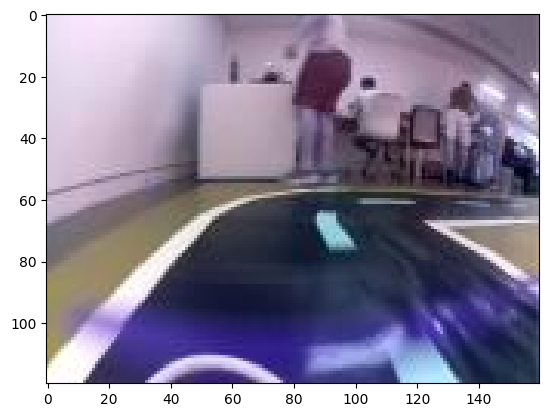

In [99]:
import matplotlib.pyplot as plt
image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [100]:
red_percentage = detect_red_line(image)
print(red_percentage)

0.112


## Detect red line

In [104]:
def frame_process(frame, filename):
    red_percentage = detect_red_line(frame)
    
    resize_multiplier = 4
    frame = cv2.resize(frame, (int(frame.shape[1] * resize_multiplier), int(frame.shape[0] * resize_multiplier)))
    
    # putText(frame, f"{natural_sort_key(filename)[1]}")
    putText(frame, filename)
    # putText(frame, filename, (255,0,0), (resize_multiplier -1 )*frame.shape[0], 10)
    putText(frame, f"{red_percentage}", (0,0,255), 50,10)
    
    return frame

In [105]:
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton, tub_path, 0, frame_process, 10, 1.0, 110))
thread.start()

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

None